In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,product,answer_option,label
0,Accucheck,Fast and accurate delivery,0
1,Accucheck,As usual it is genuine,0
2,Accucheck,Behavior of delivery boy is very bad. Delivery...,0
3,Accucheck,fwegwrqdsdvwfg,0
4,Accucheck,These strips were as per my requirment,0


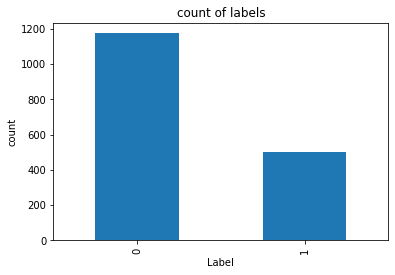

In [3]:
df['label'].value_counts().plot(kind='bar');
plt.title('count of labels')
plt.xlabel('Label')
plt.ylabel('count');

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from string import punctuation

In [10]:
stop_words = stopwords.words("english")

In [11]:
#clean the dataset

def cleaning_text(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word
 
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"http\S+", " link ", text)
    text = re.sub(r"\b\d+(?:\.\d+)?\s+", "", text)  # remove numbers
    text = text.lower()
 
    # Remove punctuation from text
    text = "".join([c for c in text if c not in punctuation])
 
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
 
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer()
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
 
    # Return a list of words
    return text

In [12]:
df['answer_option'] = df['answer_option'].apply(cleaning_text)

In [14]:
tf = TfidfVectorizer()
x = tf.fit_transform(df['answer_option'])
y = df.label

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
# create models
# lg_model = LogisticRegression(n_jobs=-1)
# rf_model = RandomForestClassifier(n_jobs=-1)
# dt_model = DecisionTreeClassifier(n_jobs=-1)
# kn_model = KNeighborsClassifier(n_jobs=-1)
# svc_model = SVCr(n_jobs=-1)

# model_lists = [lg_model, rf_model, dt_model, kn_model, svc_model]

# #fitting the models
# for model in model_lists:
#     print("Model name: {}".format(model))
#     print("*" * 50)
#     skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=True)
#     for train_index, test_index in skf.split(X_res, y_res):
#         X_train, X_test = X_res[train_index], X_res[test_index]
#         y_train, y_test = y_res[train_index], y_res[test_index]

#         #train model
#         model.fit(X_train, y_train)
#         y_preds = model.predict(X_test)
#         score = accuracy_score(y_preds, y_test)
#         print("Accuracy score:{}".format(score))
#     print("*" * 50)

In [17]:
from sklearn.metrics import f1_score, accuracy_score

## Building model with unbalanced dataset

### Random Forest

In [18]:
# building random forest model
rand = RandomForestClassifier()
rand.fit(x_train, y_train)
rand_pred = rand.predict(x_test)

In [19]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test, rand_pred, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test, rand_pred)*100}%")

f1 score = 78.07076950861119%
Accuracy score = 79.16666666666666%


### Logistic Regression

In [20]:
log = LogisticRegression()
log.fit(x_train, y_train)
log_pred = log.predict(x_test)

In [21]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test, log_pred, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test, log_pred)*100}%")

f1 score = 77.77955871700387%
Accuracy score = 80.05952380952381%


### KNeighbors Classifier

In [22]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
kn_pred = kn.predict(x_test)

In [23]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test, kn_pred, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test, kn_pred)*100}%")

f1 score = 70.9673713235294%
Accuracy score = 75.0%


### Support Vector

In [24]:
sv = SVC()
sv.fit(x_train, y_train)
sv_pred = sv.predict(x_test)

In [25]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test, sv_pred, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test, sv_pred)*100}%")

f1 score = 77.1956981106249%
Accuracy score = 78.86904761904762%


## Balanced dataset

Let us balance the dataset using SMOTE 

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_res, y_res = smote.fit_resample(x,y)

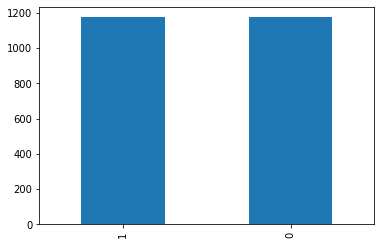

In [29]:
y_res.value_counts().plot(kind='bar');

In [30]:
x_train_ , x_test_ , y_train_, y_test_ = train_test_split(x_res, y_res, test_size=0.2)

In [31]:
rand_b = RandomForestClassifier()
rand_b.fit(x_train_, y_train_)
rand_pred_ = rand_b.predict(x_test_)

In [32]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test_, rand_pred_, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test_, rand_pred_)*100}%")

f1 score = 87.43686149427597%
Accuracy score = 87.44680851063829%


In [33]:
log_b = LogisticRegression()
log_b.fit(x_train_, y_train_)
log_pred_ = log_b.predict(x_test_)

In [34]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test_, log_pred_, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test_, log_pred_)*100}%")

f1 score = 85.31788620446832%
Accuracy score = 85.31914893617021%


In [35]:
kn_b = KNeighborsClassifier()
kn_b.fit(x_train_, y_train_)
kn_pred_ = kn_b.predict(x_test_)

In [36]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test_, kn_pred_, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test_, kn_pred_)*100}%")

f1 score = 76.91601391918277%
Accuracy score = 77.23404255319149%


In [37]:
sv_b = SVC()
sv_b.fit(x_train, y_train)
sv_pred = sv_b.predict(x_test_)

In [38]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test_, sv_pred, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test_, sv_pred)*100}%")

f1 score = 86.00460963282912%
Accuracy score = 86.17021276595744%


## hyper parameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [15, 25, 30, 35],
    'n_estimators': [100, 250, 500]}
#rf = RandomForestClassifier(random_state = 42)
rf = RandomForestClassifier()


In [50]:
# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)
grid_search.fit(x_train_, y_train_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [15, 25, 30, 35],
                         'n_estimators': [100, 250, 500]})

In [51]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 35, 'n_estimators': 500}

In [52]:
pred = grid_search.predict(x_test_)

In [53]:
print(f"f1 score = {f1_score(y_test_, pred)}")
print(f"accuracy = {accuracy_score(y_test_, pred)}")

f1 score = 0.8425720620842572
accuracy = 0.8489361702127659
